## Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load Dataset

In [2]:
df = pd.read_csv('credit_risk_dataset.csv')

## Data Understanding

| **Feature Name**                 | **Deskripsi**                                                                                            |
| -------------------------------- | --------------------------------------------------------------------------------------------------------------------- |
| **`person_age`**                 | Usia nasabah (dalam tahun).                                                                                           |
| **`person_income`**              | Pendapatan tahunan nasabah (Annual Income).                                                                           |
| **`person_home_ownership`**      | Status kepemilikan rumah, seperti *RENT*, *OWN*, *MORTGAGE*, atau *OTHER*.                                            |
| **`person_emp_length`**          | Lama bekerja (Employment length) dalam tahun.                                                                         |
| **`loan_intent`**                | Tujuan pinjaman, misalnya *EDUCATION*, *MEDICAL*, *PERSONAL*, *VENTURE*, *HOMEIMPROVEMENT*, atau *DEBTCONSOLIDATION*. |
| **`loan_grade`**                 | Kelas atau peringkat kredit pinjaman (A, B, C, D, E, F, G).                                                           |
| **`loan_amnt`**                  | Jumlah pinjaman yang diajukan (Loan amount).                                                                          |
| **`loan_int_rate`**              | Suku bunga pinjaman (Interest rate).                                                                                  |
| **`loan_status`**                | Status pinjaman: `0 = Non Default (lunas)` dan `1 = Default (gagal bayar)`.                                           |
| **`loan_percent_income`**        | Persentase besar pinjaman seseorang dibandingkan dengan pendapatan tahunannya                                                        |
| **`cb_person_default_on_file`**  | Riwayat gagal bayar sebelumnya (yes/no).                                                                              |
| **`cb_preson_cred_hist_length`** | Lama riwayat kredit (dalam tahun).                                                                                    |


In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
print (f'Data shape: {df.shape}')

Data shape: (32581, 12)


In [6]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


### Goals & Objectives
- Memprediksi nasabah yang akan gagal bayar atau tidak
- Mengidentifikasi faktor-faktor yang mempengaruhi nasabah gagal bayar

## Data Wrangling

### Handling Duplicate Data

In [7]:
len(df.drop_duplicates()) / len(df)

0.994935698720113

In [8]:
# Handling Drop duplicate
df = df.drop_duplicates()

In [9]:
duplicates = df[df.duplicated(keep=False)]
duplicates

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length


Sudah tidak ditemukan duplikasi pada data

### Handling Missing Value

In [10]:
#check missing values
missing_eda = df.isnull().sum().reset_index()
missing_eda.columns = ['features', 'missing_values']
missing_eda['percentage'] = (missing_eda['missing_values']/len(df)) *100
missing_eda

,features,missing_values,percentage
0,person_age,0,0.000000
1,person_income,0,0.000000
2,person_home_ownership,0,0.000000
3,person_emp_length,887,2.736303
4,loan_intent,0,0.000000
5,loan_grade,0,0.000000
6,loan_amnt,0,0.000000
7,loan_int_rate,3095,9.547754
8,loan_status,0,0.000000
9,loan_percent_income,0,0.000000


In [11]:
# Cek inkonsistensi data
for column in df.columns:
    print(f"============= {column} =================")
    display(df[column].value_counts())
    print()

============= person_age =================


person_age
23     3861
22     3607
24     3526
25     3023
26     2462
27     2127
28     1848
29     1682
30     1310
21     1213
31     1139
32      961
33      855
34      708
35      619
36      547
37      478
38      373
39      301
40      270
41      241
42      187
43      163
44      141
45      108
46       94
47       94
48       75
50       52
49       48
51       39
52       36
53       30
54       24
55       20
58       19
56       15
57       15
20       15
60       15
65        9
66        9
61        9
70        7
64        7
62        7
59        5
69        5
144       3
73        3
63        3
123       2
78        1
94        1
80        1
84        1
76        1
67        1
Name: count, dtype: int64


============= person_income =================


person_income
60000      1040
30000       844
50000       772
40000       655
45000       586
75000       577
65000       529
48000       527
70000       525
42000       520
36000       513
55000       469
54000       444
80000       443
35000       407
90000       386
24000       376
100000      360
120000      353
72000       352
85000       332
52000       297
44000       266
34000       237
32000       236
25000       225
78000       221
110000      218
95000       213
39000       213
62000       196
33000       194
38000       190
58000       173
56000       170
66000       167
64000       160
150000      159
68000       156
46000       155
53000       154
63000       153
130000      152
59000       150
49000       149
84000       149
51000       149
43000       148
96000       148
69000       147
37000       145
47000       144
125000      137
18000       136
57000       135
105000      134
74000       134
20000       126
28800       125
38400       124
29000       122
28000     


============= person_home_ownership =================


person_home_ownership
RENT        16378
MORTGAGE    13369
OWN          2563
OTHER         106
Name: count, dtype: int64


============= person_emp_length =================


person_emp_length
0.0      4086
2.0      3832
3.0      3442
5.0      2926
1.0      2897
4.0      2863
6.0      2652
7.0      2186
8.0      1676
9.0      1359
11.0      735
10.0      692
12.0      571
13.0      426
14.0      334
15.0      238
16.0      165
17.0      128
18.0      104
19.0       64
20.0       42
21.0       38
22.0       19
24.0       10
23.0       10
25.0        8
26.0        6
27.0        5
31.0        4
28.0        3
123.0       2
30.0        2
41.0        1
34.0        1
29.0        1
38.0        1
Name: count, dtype: int64


============= loan_intent =================


loan_intent
EDUCATION            6411
MEDICAL              6042
VENTURE              5682
PERSONAL             5498
DEBTCONSOLIDATION    5189
HOMEIMPROVEMENT      3594
Name: count, dtype: int64


============= loan_grade =================


loan_grade
A    10703
B    10387
C     6438
D     3620
E      963
F      241
G       64
Name: count, dtype: int64


============= loan_amnt =================


loan_amnt
10000    2649
5000     2033
6000     1795
12000    1795
15000    1496
8000     1441
4000     1062
3000     1027
20000    1015
7000      983
25000     804
9000      643
2000      548
7500      527
16000     489
14000     460
2500      430
18000     416
4800      386
3500      336
7200      317
1000      315
1500      313
13000     311
11000     285
9600      279
4500      278
3600      275
24000     268
6500      254
2400      249
5500      238
8500      226
6400      197
5600      196
4200      190
35000     184
8400      176
3200      173
17000     156
21000     151
14400     150
1200      139
2800      119
1800      118
11200     113
30000     103
22000     101
9500      100
12500     100
24250      92
11500      92
1600       87
10800      81
12800      80
14500      80
5400       78
6600       73
7800       71
6250       71
4750       69
10500      68
28000      67
6800       65
2100       65
7750       64
3250       62
17500      61
9250       61
19000      61
5200      


============= loan_int_rate =================


loan_int_rate
7.51     754
10.99    745
7.49     638
7.88     636
5.42     588
7.90     566
11.49    486
9.99     459
13.49    454
6.03     444
11.71    416
8.49     414
6.62     412
5.79     395
7.29     381
8.90     363
5.99     353
9.63     353
9.91     341
12.69    341
6.99     337
12.53    335
7.14     333
11.99    332
10.65    330
10.37    303
12.42    300
8.94     298
10.59    297
7.66     264
6.91     263
12.99    257
6.54     250
11.36    247
11.83    243
11.86    232
14.27    229
10.25    227
11.11    225
14.96    218
10.62    215
6.17     214
10.00    206
6.92     206
12.18    202
11.14    201
10.74    193
8.00     189
9.32     187
8.59     185
12.73    185
9.88     185
11.48    182
10.75    179
6.76     176
12.21    173
15.62    173
12.87    171
13.11    169
11.12    166
10.36    163
13.61    160
10.38    160
13.22    159
13.48    154
16.29    151
7.74     150
13.98    150
13.99    149
11.89    149
14.65    142
13.57    139
12.84    139
13.85    138
15.99    137
13.23    13


============= loan_status =================


loan_status
0    25327
1     7089
Name: count, dtype: int64


============= loan_percent_income =================


loan_percent_income
0.10    1523
0.13    1468
0.08    1432
0.07    1390
0.11    1375
0.09    1372
0.12    1288
0.14    1284
0.06    1281
0.17    1254
0.15    1245
0.05    1172
0.16    1087
0.20    1066
0.19     973
0.04     970
0.18     959
0.21     848
0.03     774
0.22     747
0.23     737
0.25     722
0.24     683
0.27     560
0.26     487
0.28     473
0.29     463
0.30     448
0.33     415
0.31     392
0.02     369
0.32     319
0.34     274
0.36     271
0.35     251
0.38     236
0.40     214
0.37     179
0.42     155
0.39     149
0.01     138
0.41     119
0.44      99
0.43      96
0.50      88
0.45      78
0.47      72
0.46      65
0.48      62
0.49      38
0.51      38
0.52      34
0.53      34
0.59      20
0.54      18
0.56      14
0.55      14
0.63      13
0.60      10
0.57      10
0.00       9
0.61       5
0.64       5
0.58       5
0.65       4
0.67       4
0.71       3
0.70       3
0.68       3
0.69       2
0.77       2
0.62       1
0.76       1
0.83       1
0.66       1
0.72 


============= cb_person_default_on_file =================


cb_person_default_on_file
N    26686
Y     5730
Name: count, dtype: int64


============= cb_person_cred_hist_length =================


cb_person_cred_hist_length
2     5925
3     5905
4     5881
7     1898
8     1893
9     1888
5     1875
6     1849
10    1846
14     492
12     483
11     462
16     449
13     443
15     437
17     406
20      31
24      30
28      27
27      22
22      22
23      22
30      22
19      21
21      20
18      19
25      18
26      16
29      14
Name: count, dtype: int64

Terdapat inkonsistensi pada data dan persentase data yang hilang masih kurang dari 20%, tidak ada kolom yang akan dihapus. Sebagai gantinya, data yang hilang akan diimputasi.
- person_emp_length = 123

In [12]:
df[df['person_emp_length'] > 100]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [13]:
# Menghapus baris dengan nilai person_emp_length = 123
df.drop(df[df['person_emp_length'] == 123].index, inplace=True)

<Axes: xlabel='loan_int_rate', ylabel='Count'>

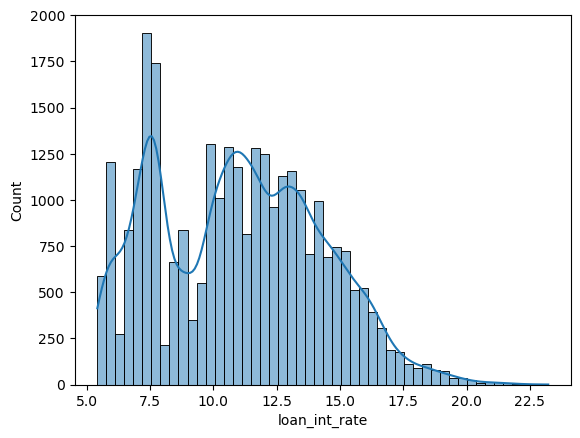

In [14]:
# Handling Missing Value Kolom loan_int_rate
sns.histplot(df['loan_int_rate'], kde=True)


Distribusi kolom loan_int_rate terlihat right-skewed maka akan menggunakan nilai median untuk melakukan handling missing value

In [15]:
df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)

C:\Users\khani\AppData\Local\Temp\ipykernel_2872\364895585.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['loan_int_rate'].fillna(df['loan_int_rate'].median(), inplace=True)


<Axes: xlabel='person_emp_length', ylabel='Count'>

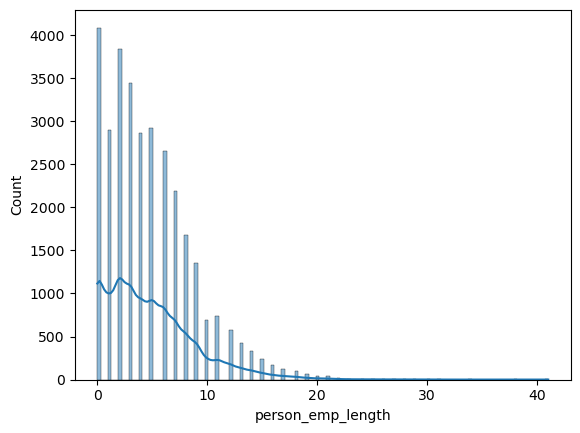

In [16]:
# Handling Missing Value Kolom person_emp_length
sns.histplot(df['person_emp_length'], kde=True)

Distribusi kolom loan_int_rate terlihat right-skewed maka akan menggunakan nilai median untuk melakukan handling missing value

In [17]:
df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)

C:\Users\khani\AppData\Local\Temp\ipykernel_2872\3490707621.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['person_emp_length'].fillna(df['person_emp_length'].median(), inplace=True)


In [18]:
#check missing values
missing_eda = df.isnull().sum().reset_index()
missing_eda.columns = ['features', 'missing_values']
missing_eda['percentage'] = (missing_eda['missing_values']/len(df)) *100
missing_eda

,features,missing_values,percentage
0,person_age,0,0.0
1,person_income,0,0.0
2,person_home_ownership,0,0.0
3,person_emp_length,0,0.0
4,loan_intent,0,0.0
5,loan_grade,0,0.0
6,loan_amnt,0,0.0
7,loan_int_rate,0,0.0
8,loan_status,0,0.0
9,loan_percent_income,0,0.0


### Handling Outlier

In [19]:
# untuk plot Q-Q
import scipy.stats as stats

In [20]:
df.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

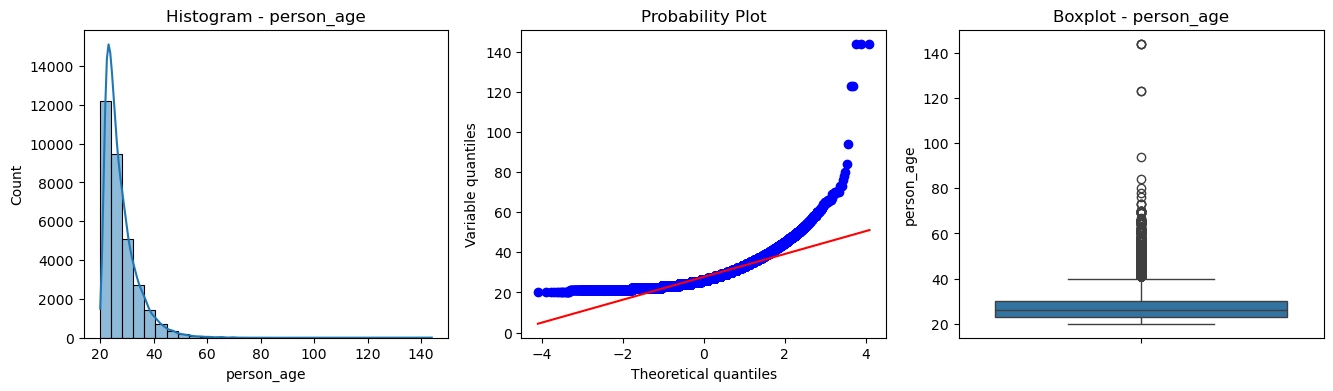

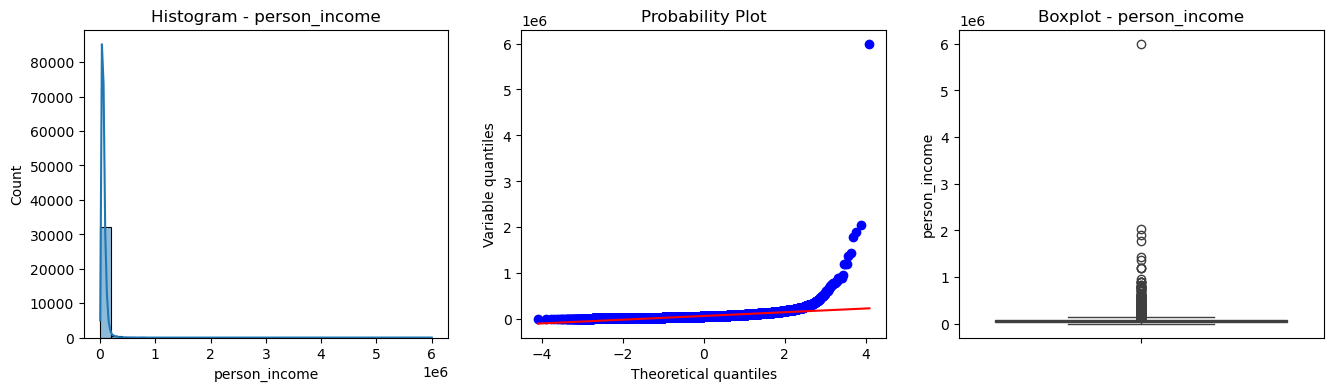

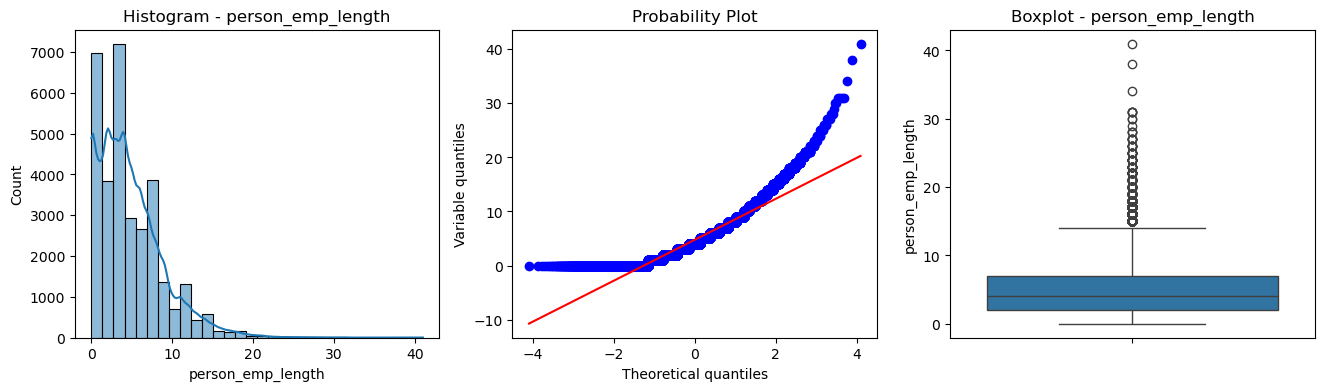

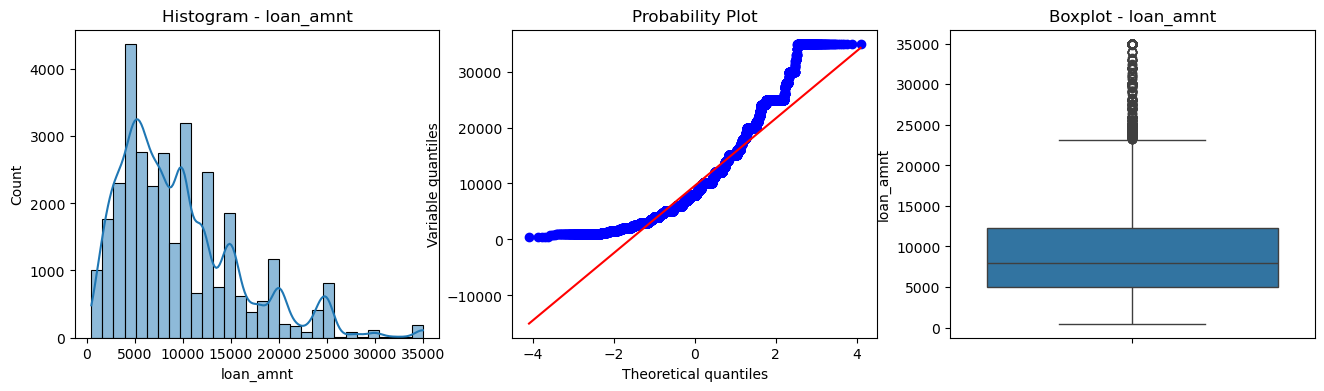

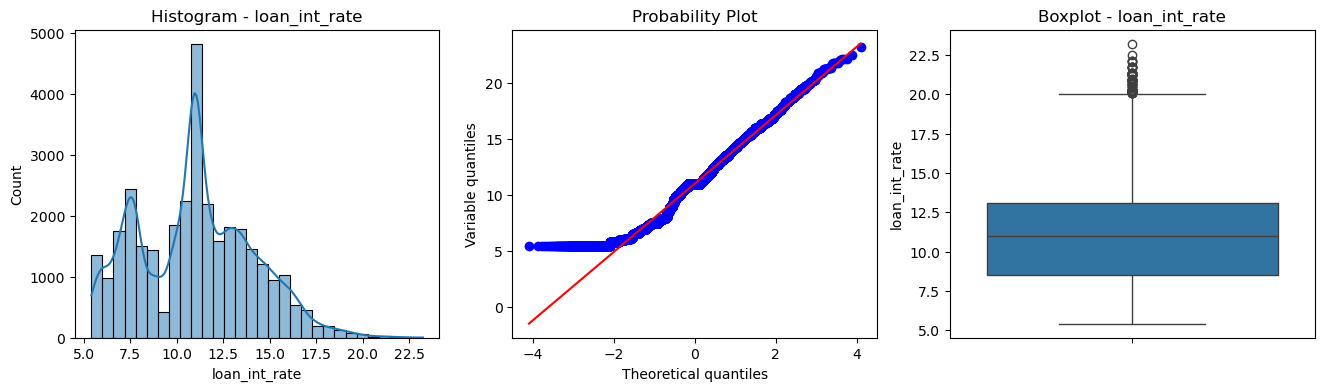

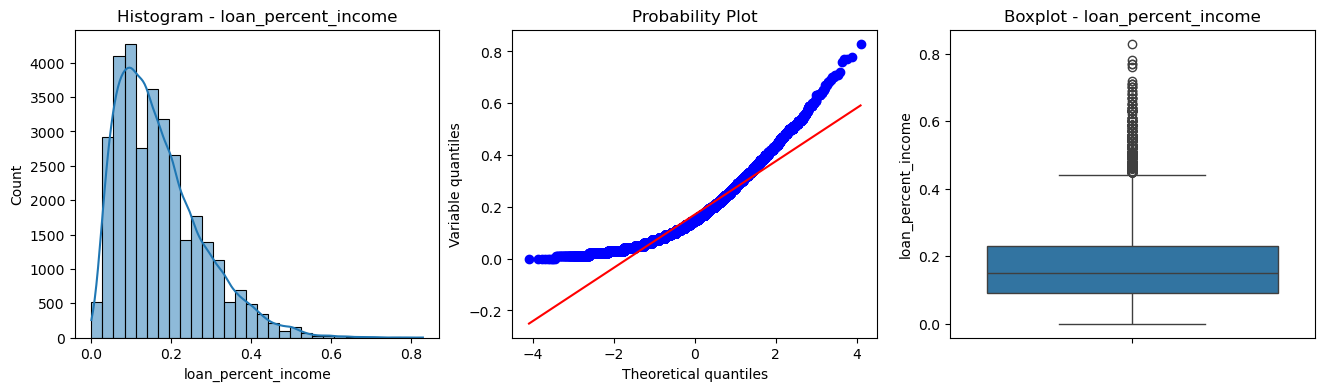

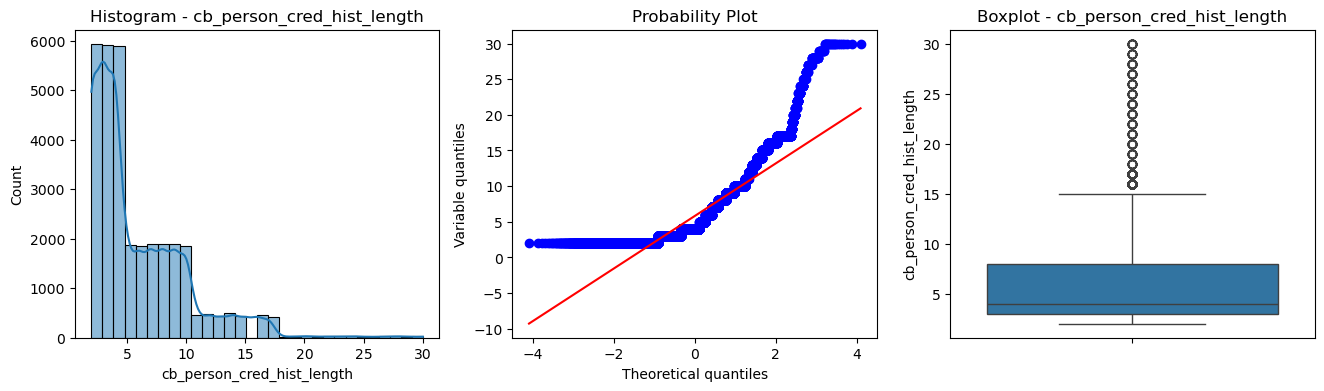

In [21]:
def check_plots(df, variables):
    for variable in variables:
        plt.figure(figsize=(16, 4))

        # histogram
        plt.subplot(1, 3, 1)
        sns.histplot(df[variable], bins=30, kde=True)
        plt.title(f'Histogram - {variable}')

        # Q-Q plot
        plt.subplot(1, 3, 2)
        stats.probplot(pd.to_numeric(df[variable], errors='coerce').dropna(),
                       dist="norm", plot=plt)
        plt.ylabel('Variable quantiles')

        # box plot
        plt.subplot(1, 3, 3)
        sns.boxplot(y=pd.to_numeric(df[variable], errors='coerce'))
        plt.title(f'Boxplot - {variable}')

        plt.show()

check_plots(df, ['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length'])

In [22]:
# function to find IQR of variables
def find_outlier_boundary(df, variable):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * 1.5)
    upper_boundary = df[variable].quantile(0.75) + (IQR * 1.5)

    return upper_boundary, lower_boundary

In [23]:
personage_upper_limit, personage_lower_limit = find_outlier_boundary(df, 'person_age')
print(f'Bounds for person age: {personage_upper_limit, personage_lower_limit}')

personincome_upper_limit, personincome_lower_limit = find_outlier_boundary(df, 'person_income')
print(f'Bounds for person income: {personincome_upper_limit, personincome_lower_limit}')

personemp_upper_limit, personemp_lower_limit = find_outlier_boundary(df, 'person_emp_length')
print(f'Bounds for person emp: {personemp_upper_limit, personemp_lower_limit}')

loanpercent_upper_limit, loanpercent_lower_limit = find_outlier_boundary(df, 'loan_percent_income')
print(f'Bounds for loan percent income: {loanpercent_upper_limit, loanpercent_lower_limit}')

cbperson_upper_limit, cbperson_lower_limit = find_outlier_boundary(df, 'cb_person_cred_hist_length')
print(f'Bounds for cb person: {cbperson_upper_limit, cbperson_lower_limit}')

Bounds for person age: (40.5, 12.5)
Bounds for person income: (140229.0, -22515.0)
Bounds for person emp: (14.5, -5.5)
Bounds for loan percent income: (0.44000000000000006, -0.12000000000000002)
Bounds for cb person: (15.5, -4.5)


In [24]:
df_no_outliers = df[
    (df['person_age'].between(personage_lower_limit, personage_upper_limit)) &
    (df['person_income'].between(personincome_lower_limit, personincome_upper_limit)) &
    (df['person_emp_length'].between(personemp_lower_limit, personemp_upper_limit)) &
    (df['loan_percent_income'].between(loanpercent_lower_limit, loanpercent_upper_limit)) &
    (df['cb_person_cred_hist_length'].between(cbperson_lower_limit, cbperson_upper_limit))
]

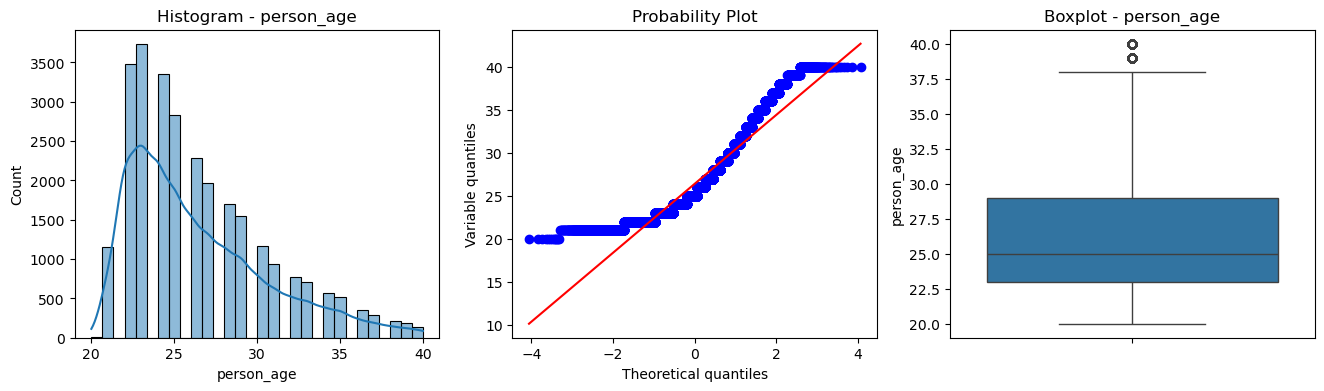

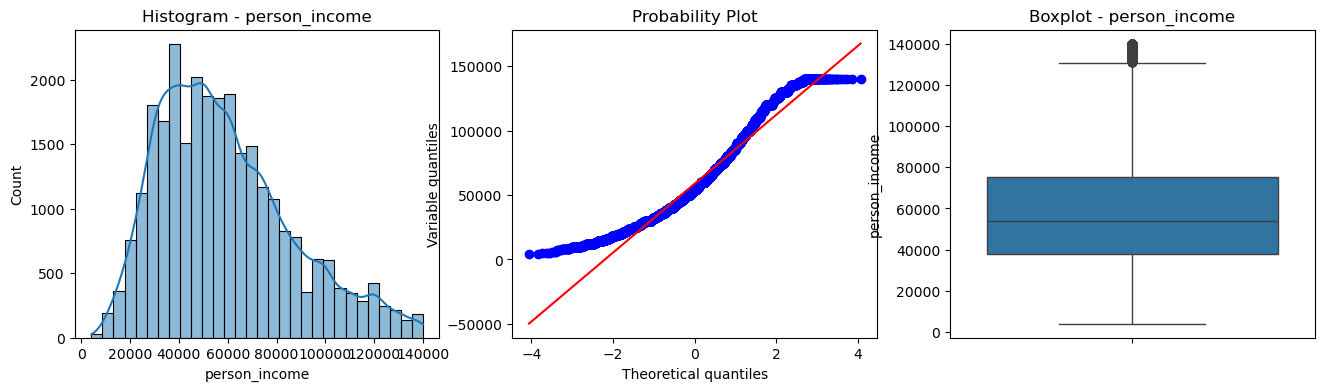

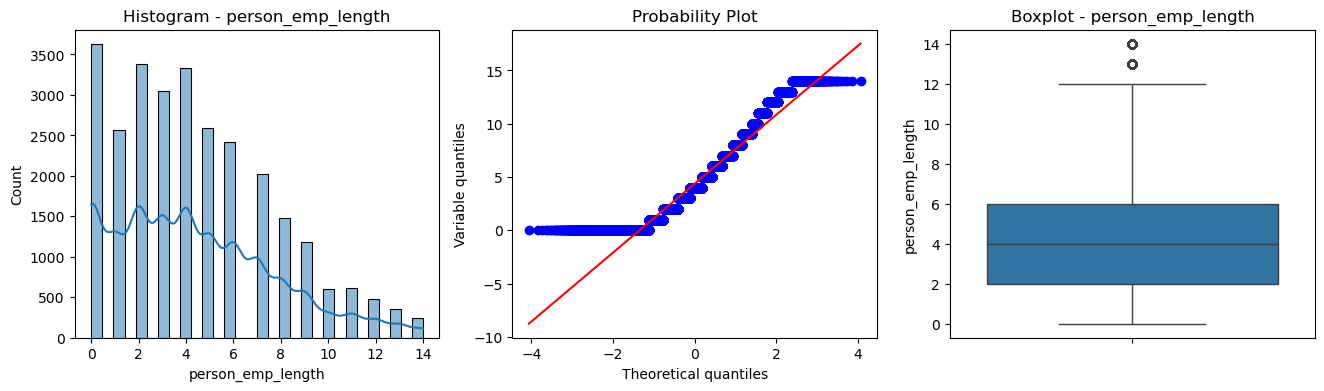

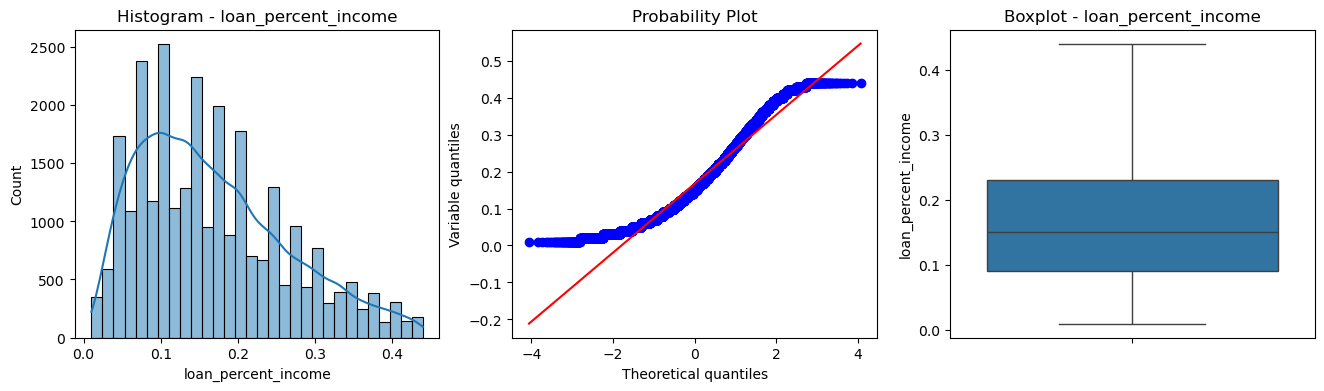

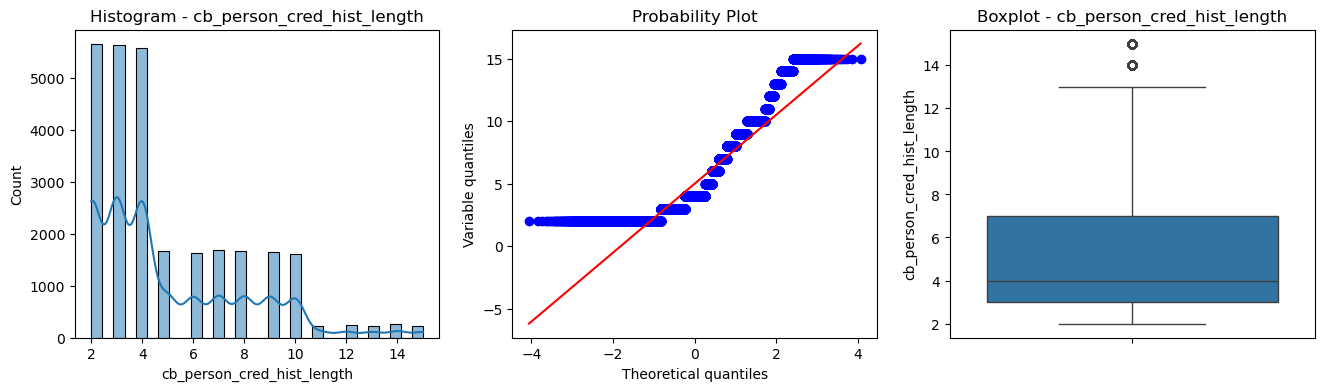

In [25]:
check_plots(df_no_outliers, ['person_age', 'person_income', 'person_emp_length', 'loan_percent_income', 'cb_person_cred_hist_length'])

## Exploratory Data Analysis (EDA)

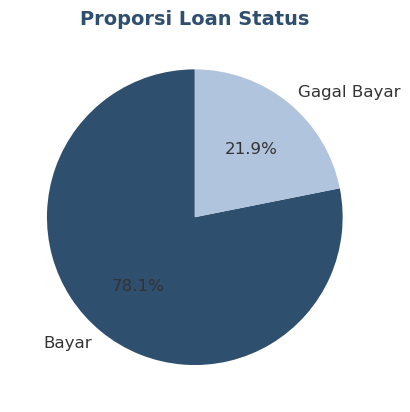

In [ ]:
colors = ['#2F4F6F', '#B0C4DE']

# Membuat Pie Chart Proporsi Loan Status
df['loan_status'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    labels=['Bayar', 'Gagal Bayar'],
    textprops={'fontsize': 12, 'color': '#333333'}
)

plt.title('Proporsi Loan Status', fontsize=14, fontweight='bold', color='#2F4F6F')
plt.ylabel('')
plt.show()


Jumlah nasabah gagal bayar : 7,088
Jumlah nasabah yang membayar     : 25,326
Total kerugian perusahaan   : $76,933,675.00
Rata-rata kerugian per nasabah : $10,854.07


C:\Users\khani\AppData\Local\Temp\ipykernel_2872\1564068858.py:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




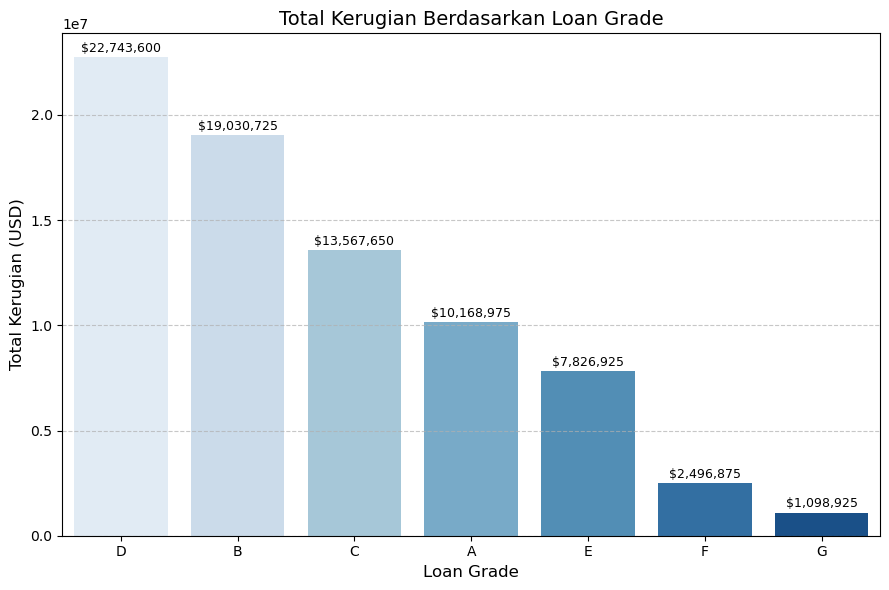

C:\Users\khani\AppData\Local\Temp\ipykernel_2872\1564068858.py:45: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




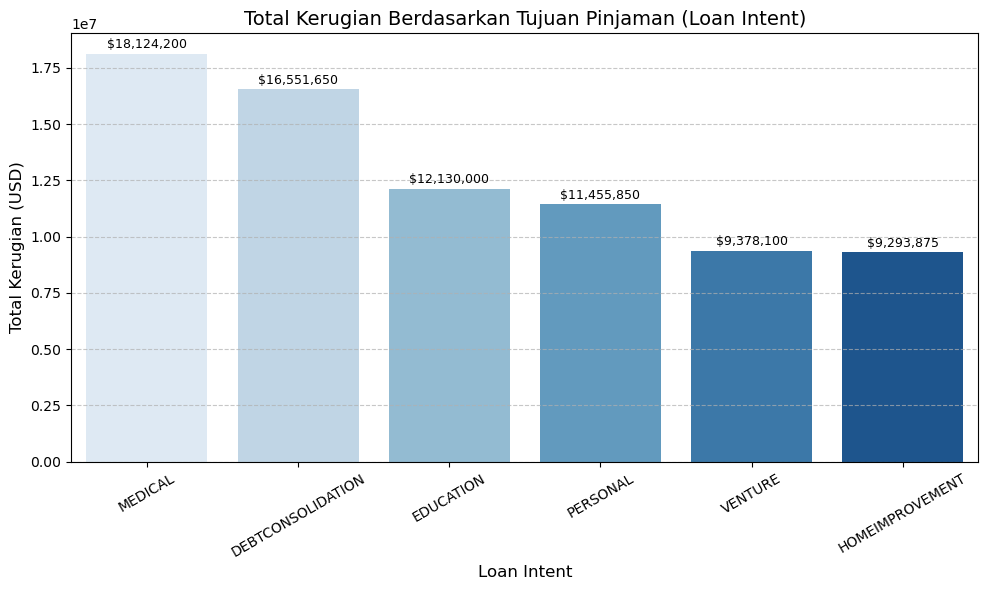

In [75]:
# Hitung total dan rata-rata kerugian dari nasabah gagal bayar
total_loss = df.loc[df['loan_status'] == 1, 'loan_amnt'].sum()
avg_loss = df.loc[df['loan_status'] == 1, 'loan_amnt'].mean()
count_default = df.loc[df['loan_status'] == 1].shape[0]
count_nodefault = df.loc[df['loan_status'] == 0].shape[0]

print(f"Jumlah nasabah gagal bayar : {count_default:,}")
print(f"Jumlah nasabah yang membayar     : {count_nodefault:,}")
print(f"Total kerugian perusahaan   : ${total_loss:,.2f}")
print(f"Rata-rata kerugian per nasabah : ${avg_loss:,.2f}")

# Visualisasi 1: Total Kerugian per Loan Grade
loss_by_grade = (
    df[df['loan_status'] == 1]
    .groupby('loan_grade')['loan_amnt']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(9,6))
colors = sns.color_palette("Blues", len(loss_by_grade))
ax = sns.barplot(x=loss_by_grade.index, y=loss_by_grade.values, palette=colors)

# Tambahkan label nilai di atas batang
for i, v in enumerate(loss_by_grade.values):
    ax.text(i, v + 100000, f"${v:,.0f}", ha='center', va='bottom', fontsize=9)

plt.title('Total Kerugian Berdasarkan Loan Grade', fontsize=14)
plt.xlabel('Loan Grade', fontsize=12)
plt.ylabel('Total Kerugian (USD)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Visualisasi 2: Total Kerugian per Tujuan Pinjaman
loss_by_intent = (
    df[df['loan_status'] == 1]
    .groupby('loan_intent')['loan_amnt']
    .sum()
    .sort_values(ascending=False)
)

plt.figure(figsize=(10,6))
colors = sns.color_palette("Blues", len(loss_by_intent))
ax = sns.barplot(x=loss_by_intent.index, y=loss_by_intent.values, palette=colors)

# Tambahkan label nilai (tanpa persentase)
for i, v in enumerate(loss_by_intent.values):
    ax.text(i, v + 100000, f"${v:,.0f}", ha='center', va='bottom', fontsize=9)

plt.title('Total Kerugian Berdasarkan Tujuan Pinjaman (Loan Intent)', fontsize=14)
plt.xlabel('Loan Intent', fontsize=12)
plt.ylabel('Total Kerugian (USD)', fontsize=12)
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\khani\AppData\Local\Temp\ipykernel_2872\1041812513.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




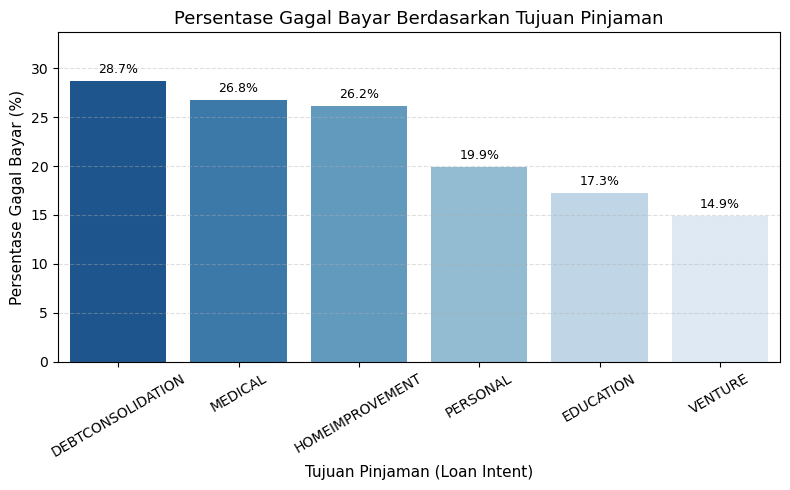

In [79]:
# Persentase Gagal Bayar Berdasarkan Tujuan Pinjaman (loan_intent)
plt.figure(figsize=(8, 5))

# Hitung persentase gagal bayar per kategori loan_intent
loan_intent_pct = (
    df.groupby('loan_intent')['loan_status']
    .mean()
    .reset_index()
    .sort_values(by='loan_status', ascending=False)
)

# Ubah ke persentase
loan_intent_pct['loan_status'] = loan_intent_pct['loan_status'] * 100

# Gunakan palet biru elegan agar sesuai dengan PPT
colors = sns.color_palette("Blues_r", len(loan_intent_pct))

# Plot bar chart
ax = sns.barplot(
    x='loan_intent',
    y='loan_status',
    data=loan_intent_pct,
    palette=colors
)

# Tambahkan label persentase tepat di atas bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,
            p.get_height() + 0.5,
            f"{p.get_height():.1f}%",
            ha='center', va='bottom',
            fontsize=9, color='black')

# Kustomisasi tampilan
plt.title('Persentase Gagal Bayar Berdasarkan Tujuan Pinjaman', fontsize=13, color='black')
plt.xlabel('Tujuan Pinjaman (Loan Intent)', fontsize=11)
plt.ylabel('Persentase Gagal Bayar (%)', fontsize=11)
plt.xticks(rotation=30)
plt.ylim(0, loan_intent_pct['loan_status'].max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


C:\Users\khani\AppData\Local\Temp\ipykernel_2872\805418912.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




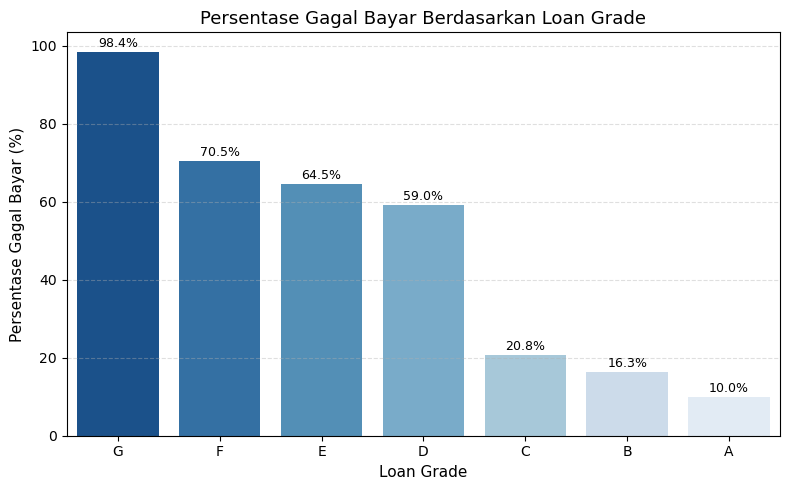

In [81]:
# Persentase Gagal Bayar Berdasarkan Loan Grade
plt.figure(figsize=(8, 5))

# Hitung persentase gagal bayar per kategori loan_grade
loan_grade_pct = (
    df.groupby('loan_grade')['loan_status']
    .mean()
    .reset_index()
    .sort_values(by='loan_status', ascending=False)
)

# Ubah ke persentase
loan_grade_pct['loan_status'] = loan_grade_pct['loan_status'] * 100

# Gunakan palet biru elegan agar sesuai dengan PPT
colors = sns.color_palette("Blues_r", len(loan_grade_pct))

# Plot bar chart
ax = sns.barplot(
    x='loan_grade',
    y='loan_status',
    data=loan_grade_pct,
    palette=colors
)

# Tambahkan label persentase tepat di atas bar
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2,
            p.get_height() + 0.5,
            f"{p.get_height():.1f}%",
            ha='center', va='bottom',
            fontsize=9, color='black')

# Kustomisasi tampilan
plt.title('Persentase Gagal Bayar Berdasarkan Loan Grade', fontsize=13, color='black')
plt.xlabel('Loan Grade', fontsize=11)
plt.ylabel('Persentase Gagal Bayar (%)', fontsize=11)
plt.ylim(0, loan_grade_pct['loan_status'].max() + 5)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()


In [29]:
# Membuat kategori umur
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']

df['age_group'] = pd.cut(df['person_age'], bins=bins, labels=labels, right=True)

# Melihat jumlah data per kelompok
print(df['age_group'].value_counts().sort_index())


age_group
18-25    15243
26-35    13711
36-45     2809
46-55      512
56-65      104
65+         30
Name: count, dtype: int64


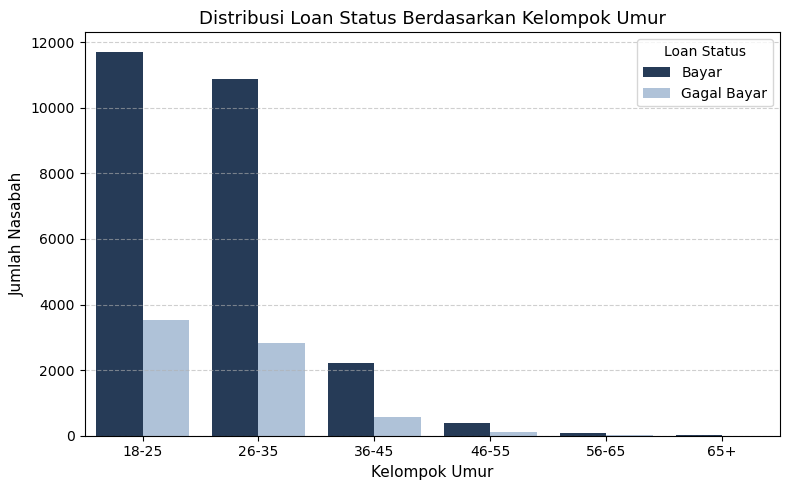

In [85]:
# Distribusi Loan Status Berdasarkan Kelompok Umur
plt.figure(figsize=(8,5))

colors = ['#1e3a5f', '#a8c1df']  # biru tua & biru muda lembut

sns.countplot(data=df, x='age_group', hue='loan_status', palette=colors)

plt.title('Distribusi Loan Status Berdasarkan Kelompok Umur', fontsize=13, color='black')
plt.xlabel('Kelompok Umur', fontsize=11)
plt.ylabel('Jumlah Nasabah', fontsize=11)
plt.legend(title='Loan Status', labels=['Bayar', 'Gagal Bayar'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [31]:
# Membuat kategori pendapatan (dalam USD)
bins = [0, 25000, 50000, 75000, 100000, 150000, df['person_income'].max()]
labels = ['<25K', '25K-50K', '50K-75K', '75K-100K', '100K-150K', '150K+']

df['income_group'] = pd.cut(df['person_income'], bins=bins, labels=labels, right=True)

# Melihat distribusi data per kelompok pendapatan
print(df['income_group'].value_counts().sort_index())


income_group
<25K          2450
25K-50K      11549
50K-75K       9584
75K-100K      4641
100K-150K     3059
150K+         1131
Name: count, dtype: int64


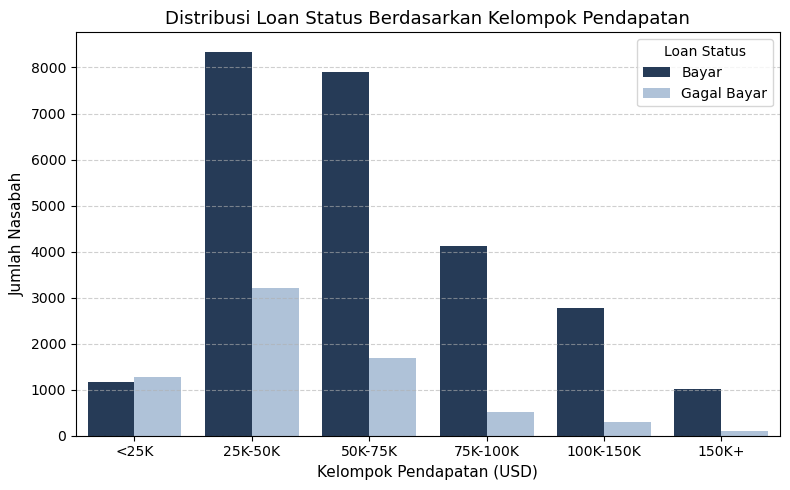

In [84]:
# Distribusi Loan Status Berdasarkan Kelompok Pendapatan
plt.figure(figsize=(8,5))

colors = ['#1e3a5f', '#a8c1df']  # biru tua = Bayar, biru muda = Gagal Bayar

sns.countplot(data=df, x='income_group', hue='loan_status', palette=colors)

plt.title('Distribusi Loan Status Berdasarkan Kelompok Pendapatan', fontsize=13, color='black')
plt.xlabel('Kelompok Pendapatan (USD)', fontsize=11)
plt.ylabel('Jumlah Nasabah', fontsize=11)

plt.legend(title='Loan Status', labels=['Bayar', 'Gagal Bayar'], loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


In [33]:
# Pastikan nilai maksimum pinjaman
max_loan = df['loan_amnt'].max()
print("Nilai maksimum loan_amnt:", max_loan)

# Buat bins yang naik secara monoton
bins = [0, 5000, 10000, 20000, 30000, 40000]
if max_loan > 40000:
    bins.append(max_loan)  # Tambahkan max jika lebih besar dari 40K

labels = ['<5K', '5K-10K', '10K-20K', '20K-30K', '30K-40K', '40K+']

# Buat kategori pinjaman
df['loan_amount_group'] = pd.cut(df['loan_amnt'], bins=bins, labels=labels[:len(bins)-1], right=True)

# Cek hasil
print(df['loan_amount_group'].value_counts().sort_index())

Nilai maksimum loan_amnt: 35000
loan_amount_group
<5K         9430
5K-10K     11983
10K-20K     8873
20K-30K     1910
30K-40K      218
Name: count, dtype: int64


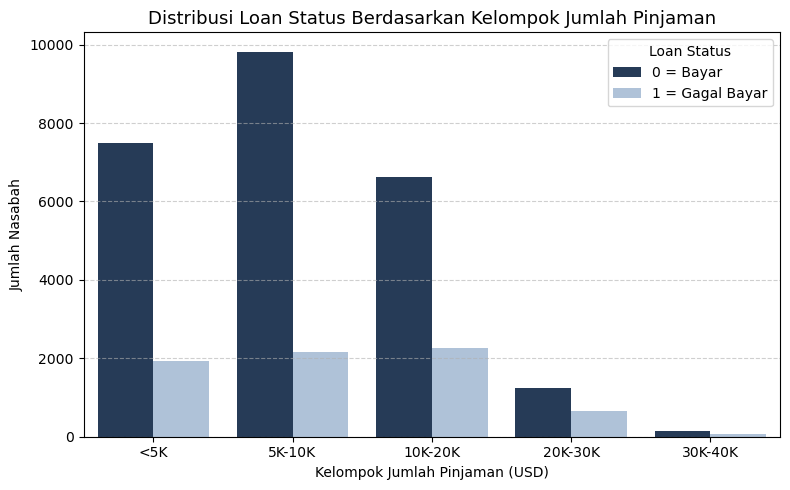

In [88]:
# Distribusi Loan Status Berdasarkan Kelompok Jumlah Pinjaman
plt.figure(figsize=(8,5))

sns.countplot(
    data=df,
    x='loan_amount_group',
    hue='loan_status',
    palette=['#1e3a5f', '#a8c1df']  # Navy gelap & biru muda
)

plt.title('Distribusi Loan Status Berdasarkan Kelompok Jumlah Pinjaman', fontsize=13)
plt.xlabel('Kelompok Jumlah Pinjaman (USD)')
plt.ylabel('Jumlah Nasabah')
plt.legend(title='Loan Status', labels=['0 = Bayar', '1 = Gagal Bayar'])
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [35]:
# Membuat kategori rasio pinjaman terhadap pendapatan
bins = [0, 0.1, 0.2, 0.3, 0.5, 0.7, df['loan_percent_income'].max()]
labels = ['<10%', '10-20%', '20-30%', '30-50%', '50-70%', '>70%']

df['loan_income_group'] = pd.cut(df['loan_percent_income'], bins=bins, labels=labels, right=True)

# Melihat distribusi per kelompok
print(df['loan_income_group'].value_counts().sort_index())

loan_income_group
<10%      10420
10-20%    11999
20-30%     6168
30-50%     3572
50-70%      237
>70%          9
Name: count, dtype: int64


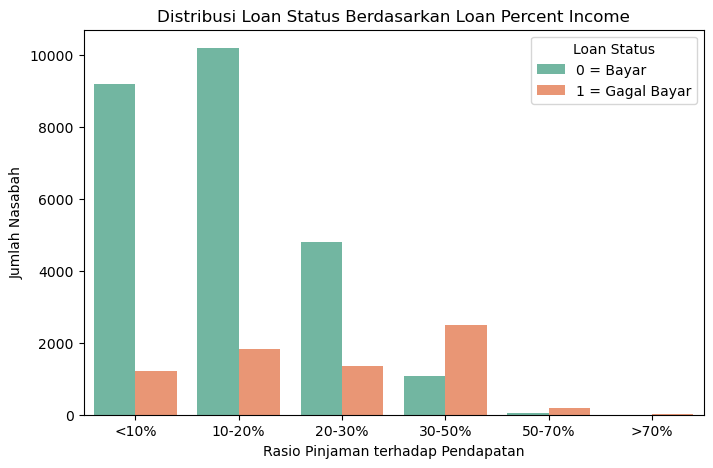

In [36]:
# Visualisasi hubungan loan_percent_income vs loan_status
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='loan_income_group', hue='loan_status', palette='Set2')

plt.title('Distribusi Loan Status Berdasarkan Loan Percent Income')
plt.xlabel('Rasio Pinjaman terhadap Pendapatan')
plt.ylabel('Jumlah Nasabah')
plt.legend(title='Loan Status', labels=['0 = Bayar', '1 = Gagal Bayar'])
plt.show()

In [37]:
# Membuat kategori pengalaman kerja
bins = [0, 1, 3, 5, 7, 10, 15, 20, df['person_emp_length'].max()]
labels = ['0-1 tahun', '2-3 tahun', '4-5 tahun', '6-7 tahun', '8-10 tahun', '11-15 tahun', '16-20 tahun', '>20 tahun']

df['emp_length_group'] = pd.cut(df['person_emp_length'], bins=bins, labels=labels, right=False)

# Melihat distribusi per kelompok
print(df['emp_length_group'].value_counts().sort_index())

emp_length_group
0-1 tahun      4086
2-3 tahun      6729
4-5 tahun      7192
6-7 tahun      5578
8-10 tahun     5221
11-15 tahun    2758
16-20 tahun     699
>20 tahun       150
Name: count, dtype: int64


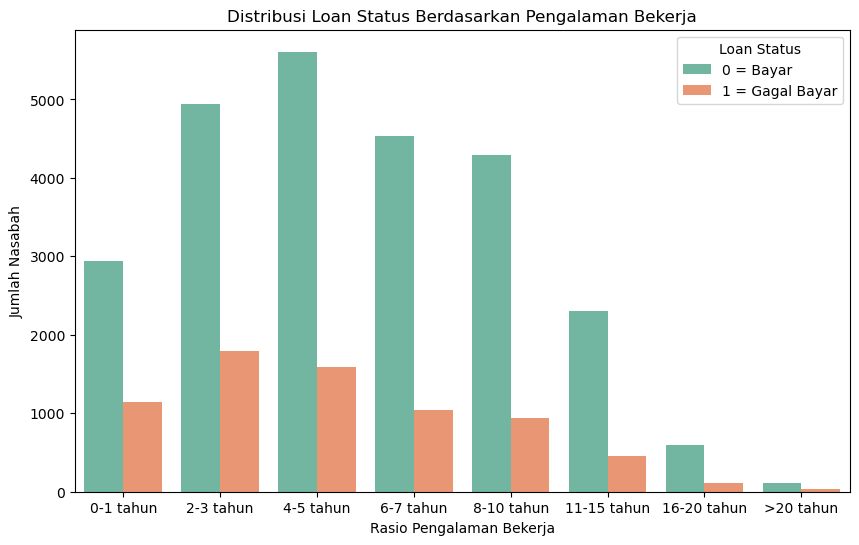

In [38]:
# Visualisasi hubungan loan_percent_income vs loan_status
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='emp_length_group', hue='loan_status', palette='Set2')

plt.title('Distribusi Loan Status Berdasarkan Pengalaman Bekerja')
plt.xlabel('Rasio Pengalaman Bekerja')
plt.ylabel('Jumlah Nasabah')
plt.legend(title='Loan Status', labels=['0 = Bayar', '1 = Gagal Bayar'])
plt.show()

## Feature Engineering

### Split Dataset

In [39]:
# Split Dataset
from sklearn.model_selection import train_test_split

feature = df.drop(['loan_status', 'income_group', 'age_group', 'loan_amount_group', 'loan_income_group', 'emp_length_group'], axis=1)
target = df['loan_status']

feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)

### Label Encoding (train - test)

In [40]:
feature_train['cb_person_default_on_file'] = feature_train['cb_person_default_on_file'].map({'N': 0, 'Y': 1})
feature_test['cb_person_default_on_file'] = feature_test['cb_person_default_on_file'].map({'N': 0, 'Y': 1})

# Cek hasil encoding
print(feature_train['cb_person_default_on_file'].value_counts())
print(feature_test['cb_person_default_on_file'].value_counts())


cb_person_default_on_file
0    21363
1     4568
Name: count, dtype: int64
cb_person_default_on_file
0    5322
1    1161
Name: count, dtype: int64


### Ordinal Encoding (train)

In [41]:
from sklearn.preprocessing import OrdinalEncoder

encoder_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ordinal_cols = ['loan_grade']

loan_grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

encoder_ordinal.set_params(categories=[loan_grade])

ordinal_train = encoder_ordinal.fit_transform(feature_train[ordinal_cols])

ordinal_df_train = pd.DataFrame(ordinal_train,
                               columns=ordinal_cols,
                               index=feature_train.index)

feature_train = pd.concat([feature_train.drop(ordinal_cols, axis=1), ordinal_df_train], axis=1)

In [42]:
feature_train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade
13090,24,88000,MORTGAGE,2.0,PERSONAL,8000,5.99,0.09,0,4,0.0
29330,36,84000,RENT,0.0,EDUCATION,20000,9.64,0.24,0,16,1.0
21528,29,30000,RENT,1.0,HOMEIMPROVEMENT,6000,17.99,0.20,0,7,4.0
16650,26,53826,MORTGAGE,10.0,HOMEIMPROVEMENT,8500,14.79,0.16,0,2,2.0
10716,25,39500,RENT,2.0,MEDICAL,10000,5.99,0.25,0,2,0.0


### Ordinal Encoding (test)

In [43]:
encoder_ordinal = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
ordinal_cols = ['loan_grade']

loan_grade = ['A', 'B', 'C', 'D', 'E', 'F', 'G']

encoder_ordinal.set_params(categories=[loan_grade])

ordinal_test = encoder_ordinal.fit_transform(feature_test[ordinal_cols])

ordinal_df_test = pd.DataFrame(ordinal_test,
                              columns=ordinal_cols,
                              index=feature_test.index)

feature_test = pd.concat([feature_test.drop(ordinal_cols, axis=1), ordinal_df_test], axis=1)

In [44]:
feature_test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade
2363,21,42000,RENT,5.0,MEDICAL,2500,9.99,0.06,0,2,1.0
14362,22,105000,MORTGAGE,2.0,VENTURE,15000,15.95,0.14,0,3,4.0
15887,21,249996,MORTGAGE,5.0,PERSONAL,5000,8.59,0.02,0,3,0.0
28264,33,50800,RENT,16.0,VENTURE,10000,16.40,0.20,1,10,4.0
14495,26,36108,RENT,7.0,MEDICAL,2000,16.49,0.06,0,3,3.0


### One Hot Encoding (train)

In [45]:
# Encode Feature
from sklearn.preprocessing import OneHotEncoder

encoder_reg = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
ohe = ['person_home_ownership', 'loan_intent']
ohe_train = encoder_reg.fit_transform(feature_train[ohe])

ohe_df = pd.DataFrame(ohe_train,
                      columns=encoder_reg.get_feature_names_out(ohe),
                      index=feature_train.index)

feature_train = pd.concat([feature_train.drop(ohe, axis=1), ohe_df], axis=1)

In [46]:
feature_train.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
13090,24,88000,2.0,8000,5.99,0.09,0,4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29330,36,84000,0.0,20000,9.64,0.24,0,16,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
21528,29,30000,1.0,6000,17.99,0.20,0,7,4.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
16650,26,53826,10.0,8500,14.79,0.16,0,2,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10716,25,39500,2.0,10000,5.99,0.25,0,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### One Hot Encoding (test)

In [47]:
# Encoding Feature
ohe_test = encoder_reg.transform(feature_test[ohe])

ohe_test_df = pd.DataFrame(
    ohe_test,
    columns=encoder_reg.get_feature_names_out(ohe),
    index=feature_test.index
)

feature_test = pd.concat([feature_test.drop(columns=ohe), ohe_test_df], axis=1)

In [48]:
feature_test.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_grade,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
2363,21,42000,5.0,2500,9.99,0.06,0,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
14362,22,105000,2.0,15000,15.95,0.14,0,3,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
15887,21,249996,5.0,5000,8.59,0.02,0,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28264,33,50800,16.0,10000,16.40,0.20,1,10,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
14495,26,36108,7.0,2000,16.49,0.06,0,3,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


### Check Multicoleniarity

In [49]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

c:\Users\khani\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\khani\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,person_age,3.916491
2,person_income,1.480365
3,person_emp_length,1.111319
4,loan_amnt,2.146750
5,loan_int_rate,4.912887
6,loan_percent_income,2.098615
7,cb_person_default_on_file,1.412120
8,cb_person_cred_hist_length,3.805989
9,loan_grade,5.329295
10,person_home_ownership_MORTGAGE,inf


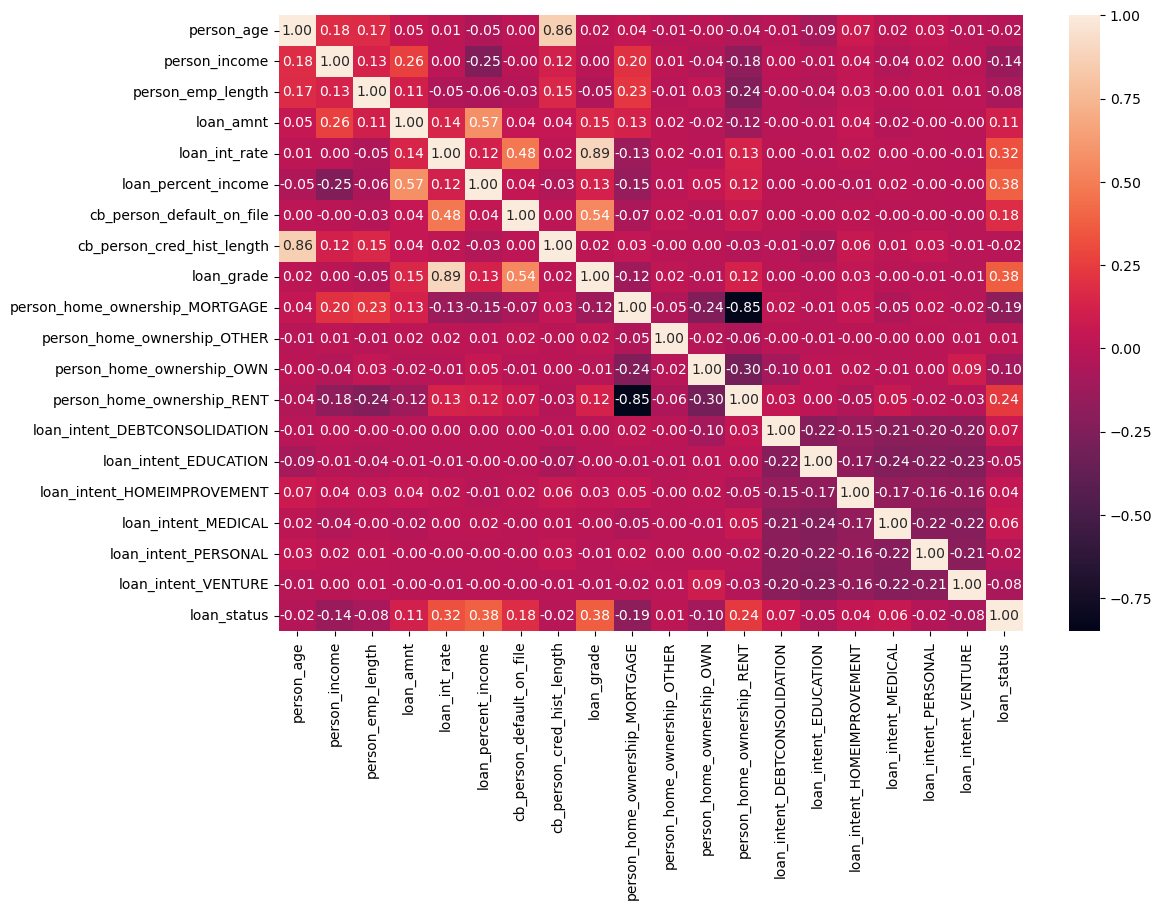

In [50]:
# heatmap correlation
heatmap_corr = pd.concat([feature_train, target_train], axis=1)
corr = heatmap_corr.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Interpretasi:
- Drop kolom cb_person_cred_hist_length dan loan_int_rate karena keduanya menunjukkan tingkat multikolinearitas yang tinggi.

In [51]:
# drop redundant features
feature_train = feature_train.drop(columns=['cb_person_cred_hist_length', 'loan_int_rate'])
feature_test = feature_test.drop(columns=['cb_person_cred_hist_length', 'loan_int_rate'])

In [52]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from statsmodels.tools.tools import add_constant

X = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X.values, i)
               for i in range(X.shape[1])],
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

c:\Users\khani\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\khani\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,person_age,1.073429
2,person_income,1.470018
3,person_emp_length,1.110851
4,loan_amnt,2.142356
5,loan_percent_income,2.096262
6,cb_person_default_on_file,1.412084
7,loan_grade,1.467837
8,person_home_ownership_MORTGAGE,inf
9,person_home_ownership_OTHER,inf
10,person_home_ownership_OWN,inf


### Scaling

In [53]:
from sklearn.preprocessing import StandardScaler

# Misalnya fitur-fitur yang ingin di-scale
columns_to_scale = ['person_age', 'person_income', 'person_emp_length',
                    'loan_amnt','loan_percent_income']

# Inisialisasi scaler
scaler = StandardScaler()

feature_train_scaled = feature_train.copy()
feature_test_scaled = feature_test.copy()

feature_train_scaled[columns_to_scale] = scaler.fit_transform(feature_train[columns_to_scale])
feature_test_scaled[columns_to_scale] = scaler.transform(feature_test[columns_to_scale])

In [54]:
feature_train_scaled.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_percent_income,cb_person_default_on_file,loan_grade,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
count,2.593100e+04,2.593100e+04,2.593100e+04,2.593100e+04,2.593100e+04,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000,25931.000000
mean,-1.487890e-16,-8.110781e-17,-7.829917e-17,3.616970e-17,3.726575e-16,0.176160,1.220046,0.410937,0.003201,0.077822,0.508041,0.160619,0.197447,0.110447,0.186302,0.168524,0.176661
std,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,1.000019e+00,0.380963,1.168068,0.492013,0.056486,0.267896,0.499945,0.367186,0.398080,0.313452,0.389358,0.374338,0.381389
min,-1.219297e+00,-9.710920e-01,-1.194526e+00,-1.433997e+00,-1.593001e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.475406e-01,-4.327281e-01,-6.911619e-01,-7.229553e-01,-7.509008e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.757841e-01,-1.723306e-01,-1.877981e-01,-2.489273e-01,-1.895005e-01,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.532246e-01,2.049320e-01,5.672476e-01,3.831100e-01,5.590333e-01,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.827997e+01,9.308448e+01,9.124432e+00,4.017325e+00,6.173036e+00,1.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Modeling Machine Learning

In [55]:
# Import Decision Tree classifier (DT)
from sklearn.tree import DecisionTreeClassifier
# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
# load KNN classifier model
from sklearn.neighbors import KNeighborsClassifier
# Xg-Boost
from xgboost import XGBClassifier
# Light-GBM
from lightgbm import LGBMClassifier
# Random Forest
from sklearn.ensemble import RandomForestClassifier

#Metrics Evaluate
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, make_scorer

### Model Selection

In [56]:
# Inisialisasi model
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(random_state=42)
}

results = []

# Loop semua model
for name, clf in classifiers.items():
    clf.fit(feature_train, target_train)

    # Predict training set
    y_pred_train = clf.predict(feature_train)
    y_pred_train_probs = clf.predict_proba(feature_train)[:, 1]

    # Predict testing set
    y_pred_test = clf.predict(feature_test)
    y_pred_test_probs = clf.predict_proba(feature_test)[:, 1]

    # Evaluate training set
    precision_train = precision_score(target_train, y_pred_train, pos_label=1)
    recall_train = recall_score(target_train, y_pred_train, pos_label=1)
    f1_train = f1_score(target_train, y_pred_train, pos_label=1)
    roc_auc_train = roc_auc_score(target_train, y_pred_train_probs)

    # Evaluate testing set
    precision_test = precision_score(target_test, y_pred_test, pos_label=1)
    recall_test = recall_score(target_test, y_pred_test, pos_label=1)
    f1_test = f1_score(target_test, y_pred_test, pos_label=1)
    roc_auc_test = roc_auc_score(target_test, y_pred_test_probs)

    # Simpan hasil
    results.append({
        'Model': name,
        'Precision (train)': precision_train,
        'Recall (train)': recall_train,
        'F1-Score (train)': f1_train,
        'ROC AUC (train)': roc_auc_train,
        'Precision (test)': precision_test,
        'Recall (test)': recall_test,
        'F1-Score (test)': f1_test,
        'ROC AUC (test)': roc_auc_test
    })

# Buat DataFrame hasil
results_df = pd.DataFrame(results)
results_df

c:\Users\khani\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\khani\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:11:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 5690, number of negative: 20241
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001169 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 669
[LightGBM] [Info] Number of data points in the train set: 25931, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.219428 -> initscore=-1.269000
[LightGBM] [Info] Start training from score -1.269000


,Model,Precision (train),Recall (train),F1-Score (train),ROC AUC (train),Precision (test),Recall (test),F1-Score (test),ROC AUC (test)
0,Logistic Regression,0.738349,0.462214,0.568526,0.847939,0.734282,0.442775,0.552432,0.848173
1,K-Nearest Neighbors,0.785333,0.594728,0.676868,0.930743,0.647228,0.484263,0.554010,0.802690
2,Decision Tree,1.000000,0.999649,0.999824,1.000000,0.756606,0.778255,0.767278,0.854712
3,Random Forest,1.000000,0.999473,0.999736,1.000000,0.979671,0.723891,0.832579,0.931043
4,XGBoost,0.990245,0.802812,0.886732,0.987407,0.966574,0.744635,0.841212,0.947291
5,LightGBM,0.989946,0.744112,0.849604,0.974099,0.983591,0.728898,0.837305,0.946609


Berdasarkan hasil evaluasi base model yang disajikan, XGBoost terbukti sebagai base model dengan performa terbaik. Model ini mencapai F1-Score tertinggi pada data test (0.8412) dan sekaligus ROC AUC tertinggi (0.9473), yang menunjukkan keseimbangan optimal antara precision dan recall serta kemampuan klasifikasi yang sangat baik.

Meskipun Random Forest dan LightGBM juga menunjukkan hasil yang kompetitif, XGBoost berhasil menyeimbangkan performa yang tinggi dengan generalisasi yang baik. Hal ini terlihat dari:

- Precision test: 0.9666 (sangat tinggi)
- Recall test: 0.7446 (baik)
- Selisih performa train-test yang tidak terlalu besar, mengindikasikan overfitting yang minimal

Sementara itu, model seperti Decision Tree dan Random Forest menunjukkan tanda overfitting yang signifikan dengan skor training sempurna (1.0000) tetapi penurunan yang jelas pada data test.

Oleh karena itu, XGBoost merupakan pilihan paling optimal untuk tugas klasifikasi prediksi gagal bayar ini, dengan kombinasi metrik yang solid dan kemampuan generalisasi yang terbaik di antara semua model yang diuji.

### Model Training and Evaluation with XGBoost

### Base Model

In [57]:
# Inisialisasi model XGBoost
xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',  # untuk menghindari warning
    use_label_encoder=False
)

# Fit model ke data training
xgb.fit(feature_train, target_train)

# Prediksi untuk data training
xgb_pred_train = xgb.predict(feature_train)
xgb_pred_train_probs = xgb.predict_proba(feature_train)[:, 1]

# Prediksi untuk data testing
xgb_pred_test = xgb.predict(feature_test)
xgb_pred_test_probs = xgb.predict_proba(feature_test)[:, 1]

# Evaluasi metrik untuk data training
xgb_train_metrics = {
    'Precision': precision_score(target_train, xgb_pred_train, pos_label=1),
    'Recall': recall_score(target_train, xgb_pred_train, pos_label=1),
    'F1-Score': f1_score(target_train, xgb_pred_train, pos_label=1),
    'ROC AUC': roc_auc_score(target_train, xgb_pred_train_probs)
}

# Evaluasi metrik untuk data testing
xgb_test_metrics = {
    'Precision': precision_score(target_test, xgb_pred_test, pos_label=1),
    'Recall': recall_score(target_test, xgb_pred_test, pos_label=1),
    'F1-Score': f1_score(target_test, xgb_pred_test, pos_label=1),
    'ROC AUC': roc_auc_score(target_test, xgb_pred_test_probs)
}

# Gabungkan ke dalam satu DataFrame
xgb_evaluation_df = pd.DataFrame([xgb_train_metrics, xgb_test_metrics], index=['Train', 'Test'])

# Tampilkan hasil
xgb_evaluation_df


c:\Users\khani\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:11:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Precision,Recall,F1-Score,ROC AUC
Train,0.990245,0.802812,0.886732,0.987407
Test,0.966574,0.744635,0.841212,0.947291


### Hyperparameter Tuning

In [58]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold

# Definisikan model dasar
tuned_xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',  # untuk menghindari warning
    use_label_encoder=False
)

# Definisikan parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 495],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0, 0.1, 1],
    'min_child_weight': [1, 3, 5],  # mirip num_leaves di LightGBM
    'gamma': [0, 0.1, 0.3]          # kontrol regularisasi tambahan
}

# Cross Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Gunakan F1 sebagai metrik evaluasi
f1_scorer = make_scorer(f1_score)

# Randomized Search
random_search_xgb = RandomizedSearchCV(
    estimator=tuned_xgb,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv,
    scoring=f1_scorer,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# Fit model ke data training
random_search_xgb.fit(feature_train, target_train)

print("Best set of hyperparameters: ", random_search_xgb.best_params_)
print("Best F1 score: ", random_search_xgb.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best set of hyperparameters:  {'subsample': 1.0, 'reg_lambda': 0, 'reg_alpha': 1, 'n_estimators': 100, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 1.0}
Best F1 score:  0.8324806021311357


c:\Users\khani\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:11:34] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [59]:
# Ambil model terbaik dari hasil hypertuning
tuned_xgb = random_search_xgb.best_estimator_

# Prediksi pada data train
tuned_xgb_pred_train = tuned_xgb.predict(feature_train)
tuned_xgb_pred_train_probs = tuned_xgb.predict_proba(feature_train)[:, 1]

# Prediksi pada data test
tuned_xgb_pred_test = tuned_xgb.predict(feature_test)
tuned_xgb_pred_test_probs = tuned_xgb.predict_proba(feature_test)[:, 1]

# Evaluasi metrik untuk data train
tuned_train_metrics = {
    'Precision': precision_score(target_train, tuned_xgb_pred_train, pos_label=1),
    'Recall': recall_score(target_train, tuned_xgb_pred_train, pos_label=1),
    'F1-Score': f1_score(target_train, tuned_xgb_pred_train, pos_label=1),
    'ROC AUC': roc_auc_score(target_train, tuned_xgb_pred_train_probs)
}

# Evaluasi metrik untuk data test
tuned_test_metrics = {
    'Precision': precision_score(target_test, tuned_xgb_pred_test, pos_label=1),
    'Recall': recall_score(target_test, tuned_xgb_pred_test, pos_label=1),
    'F1-Score': f1_score(target_test, tuned_xgb_pred_test, pos_label=1),
    'ROC AUC': roc_auc_score(target_test, tuned_xgb_pred_test_probs)
}

# Buat DataFrame evaluasi
tuned_xgb_evaluation_df = pd.DataFrame(
    [tuned_train_metrics, tuned_test_metrics],
    index=['Train', 'Test']
)

# Tampilkan hasil evaluasi
tuned_xgb_evaluation_df


,Precision,Recall,F1-Score,ROC AUC
Train,0.990269,0.751142,0.854287,0.976010
Test,0.984496,0.726753,0.836214,0.947167


### Hyperparameter Tuning with SMOTE

In [60]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# Definisikan Model XGBoost
smote_xgb = XGBClassifier(
    random_state=42,
    eval_metric='logloss',
    use_label_encoder=False
)

# Parameter Grid untuk Random Search
param_grid = {
    'xgb__max_depth': [3, 5, 7, 10],
    'xgb__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'xgb__n_estimators': [100, 200, 300, 498],
    'xgb__subsample': [0.6, 0.8, 1.0],
    'xgb__colsample_bytree': [0.6, 0.8, 1.0],
    'xgb__reg_alpha': [0, 0.1, 1],
    'xgb__reg_lambda': [0, 0.1, 1],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__gamma': [0, 0.1, 0.3]
}

# Buat pipeline: SMOTE + XGBoost
pipeline = Pipeline(steps=[
    ('smote', SMOTE(random_state=42)),
    ('xgb', smote_xgb)
])

# Cross-validation dan scoring
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scorer = make_scorer(f1_score)

# Randomized Search CV
smote_random_search_xgb = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_grid,
    n_iter=15,
    cv=cv,
    scoring=f1_scorer,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit model ke data training
smote_random_search_xgb.fit(feature_train, target_train)

# Hasil terbaik
print("Best hyperparameters:", smote_random_search_xgb.best_params_)
print("Best F1 score (CV):", smote_random_search_xgb.best_score_)


Fitting 5 folds for each of 15 candidates, totalling 75 fits


c:\Users\khani\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:12:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best hyperparameters: {'xgb__subsample': 0.6, 'xgb__reg_lambda': 0.1, 'xgb__reg_alpha': 0, 'xgb__n_estimators': 300, 'xgb__min_child_weight': 3, 'xgb__max_depth': 10, 'xgb__learning_rate': 0.05, 'xgb__gamma': 0, 'xgb__colsample_bytree': 0.6}
Best F1 score (CV): 0.8312816477375934


In [61]:
# Ambil model terbaik dari hasil hypertuning
smote_xgb_model = smote_random_search_xgb.best_estimator_

# Prediksi pada training set
smote_xgb_pred_train = smote_xgb_model.predict(feature_train)
smote_xgb_pred_train_probs = smote_xgb_model.predict_proba(feature_train)[:, 1]

# Prediksi pada testing set
smote_xgb_pred_test = smote_xgb_model.predict(feature_test)
smote_xgb_pred_test_probs = smote_xgb_model.predict_proba(feature_test)[:, 1]

# Evaluasi metrik untuk training
smote_xgb_train_metrics = {
    'Precision': precision_score(target_train, smote_xgb_pred_train, pos_label=1),
    'Recall': recall_score(target_train, smote_xgb_pred_train, pos_label=1),
    'F1-Score': f1_score(target_train, smote_xgb_pred_train, pos_label=1),
    'ROC AUC': roc_auc_score(target_train, smote_xgb_pred_train_probs)
}

# Evaluasi metrik untuk testing
smote_xgb_test_metrics = {
    'Precision': precision_score(target_test, smote_xgb_pred_test, pos_label=1),
    'Recall': recall_score(target_test, smote_xgb_pred_test, pos_label=1),
    'F1-Score': f1_score(target_test, smote_xgb_pred_test, pos_label=1),
    'ROC AUC': roc_auc_score(target_test, smote_xgb_pred_test_probs)
}

# Gabungkan hasil evaluasi ke dalam DataFrame
smote_xgb_evaluation_df = pd.DataFrame(
    [smote_xgb_train_metrics, smote_xgb_test_metrics],
    index=['Train', 'Test']
)

# Tampilkan hasil evaluasi
smote_xgb_evaluation_df


,Precision,Recall,F1-Score,ROC AUC
Train,0.992906,0.811775,0.893251,0.991971
Test,0.963585,0.738197,0.835966,0.946877


### Model Analysis

In [62]:
evaluation_df = pd.DataFrame([xgb_train_metrics, xgb_test_metrics,
                              tuned_train_metrics, tuned_test_metrics,
                              smote_xgb_train_metrics,smote_xgb_test_metrics],
                             index = ['Base XGBoost Train', 'Base XGBoost Test',
                                      'Hyperparameter Tuning XGBoost (Train)', 'Hyperparameter Tuning XGBoost (Test)',
                                      'Hyperparameter Tuning XGBoost (SMOTE) (Train)', 'Hyperparameter Tuning XGBoost (SMOTE) (Test)'])
evaluation_df

,Precision,Recall,F1-Score,ROC AUC
Base XGBoost Train,0.990245,0.802812,0.886732,0.987407
Base XGBoost Test,0.966574,0.744635,0.841212,0.947291
Hyperparameter Tuning XGBoost (Train),0.990269,0.751142,0.854287,0.976010
Hyperparameter Tuning XGBoost (Test),0.984496,0.726753,0.836214,0.947167
Hyperparameter Tuning XGBoost (SMOTE) (Train),0.992906,0.811775,0.893251,0.991971
Hyperparameter Tuning XGBoost (SMOTE) (Test),0.963585,0.738197,0.835966,0.946877


Interpretasi:
- Base XGBoost Model menunjukkan performa terbaik tanpa perlu hyperparameter tuning atau SMOTE. Upaya tuning dan handling class imbalance justru menurunkan keseimbangan overall model, khususnya dalam hal recall dan F1-Score yang krusial untuk use case prediksi gagal bayar.

<Figure size 800x600 with 0 Axes>

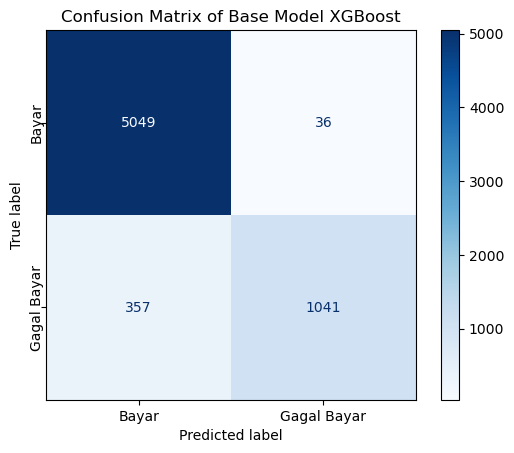

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix untuk Base Model XGBoost
cm_xgboost = confusion_matrix(target_test, xgb_pred_test)

# Tampilkan confusion matrix
xgboost_display = ConfusionMatrixDisplay(confusion_matrix=cm_xgboost,
                                      display_labels=['Bayar', 'Gagal Bayar'])

plt.figure(figsize=(8, 6))
xgboost_display.plot(cmap='Blues', values_format='d')
plt.yticks(rotation=90, ha='center', va='center')
plt.title('Confusion Matrix of Base Model XGBoost')
plt.show()

Interpretasi:

- 5.049 adalah jumlah prediksi yang benar untuk kategori "Bayar" (model memprediksi "Bayar" dan benar).
- 36 adalah jumlah prediksi yang salah untuk kategori "Bayar" (model memprediksi "Gagal Bayar" padahal seharusnya "Bayar").
- 357 adalah jumlah prediksi yang salah untuk kategori "Gagal Bayar" (model memprediksi "Bayar" padahal seharusnya "Gagal Bayar").
- 1.041 adalah jumlah prediksi yang benar untuk kategori "Gagal Bayar" (model memprediksi "Gagal Bayar" dan benar).

Secara keseluruhan model memberikan hasil yang sangat akurat, dengan tingkat kesalahan yang sangat rendah pada kategori Bayar, meskipun terdapat kesalahan yang perlu diperhatikan pada kategori Gagal Bayar.

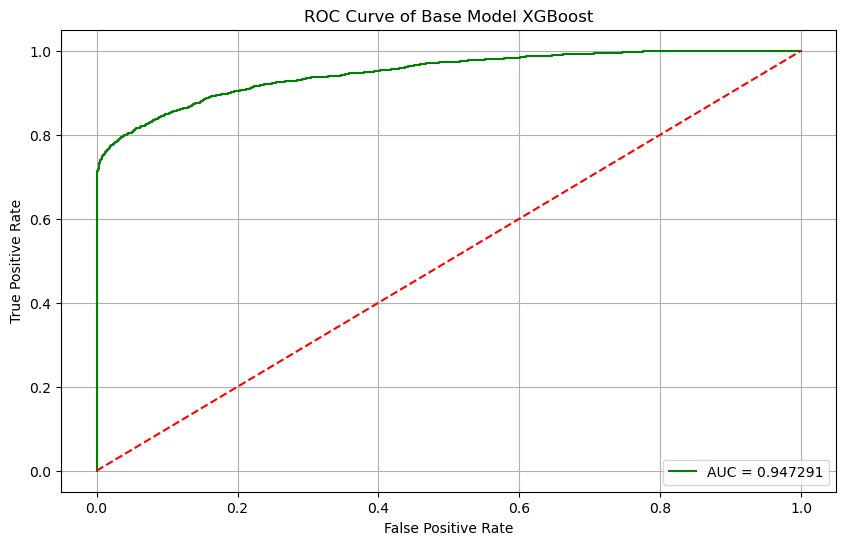

In [64]:
from sklearn.metrics import roc_curve, roc_auc_score

# Hitung ROC curve dan AUC untuk base model XGBoost
xgboost_fpr, xgboost_tpr, xgboost_thresholds = roc_curve(target_test, xgb_pred_test_probs)
xgboost_roc_auc = roc_auc_score(target_test, xgb_pred_test_probs)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(xgboost_fpr, xgboost_tpr, color='green', label=f'AUC = {xgboost_roc_auc:.6f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('ROC Curve of Base Model XGBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()

Berdasarkan ROC Curve dengan nilai AUC sebesar 0.947, model XGBoost terbukti sangat baik dalam memprediksi risiko gagal bayar pinjaman, menunjukkan keseimbangan yang kuat antara sensitivitas (recall) dan precision.

### Feature Importance

In [65]:
import dalex as dx

xgb = dx.Explainer(
    xgb,
    feature_train,             
    target_train,              
    label="XGBoost Interpretation"
)

Preparation of a new explainer is initiated

  -> data              : 25931 rows 17 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 25931 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x000001A6A07CD440> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 7.23e-07, mean = 0.219, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.769, mean = -5.73e-05, max = 0.991
  -> model_info        : package xgboost

A new explainer has been created!


In [66]:
# visualizr permutation feature importance for XGBoost Model
xgb.model_parts().plot()

## Business Recommendation Based on Feature Importance

1. Loan Grade (Mewakili tingkat risiko dari nasabah berdasarkan kondisi keuangannya dan riwayat kredit.)
    - Lakukan monitoring rutin melalui sistem peringatan dini (early warning system) untuk mendeteksi kemungkinan gagal bayar.
    - Bangun program referral untuk menarik nasabah serupa
    - Berikan edukasi keuangan dan reminder otomatis untuk jadwal pembayaran.

2. Personal Income (Pendapatan tahunan nasabah) 
    - Buat segmentasi berdasarkan income nasabah dan penerapan kebijakan pinjaman, pendapatan rendah = mitigasi risiko tinggi & pendapatan tinggi = ekspansi agresif
    - Gunakan sistem SMS/email reminder otomatis menjelang jatuh tempo.
    - Evaluasi ulang pinjaman jika ada penurunan penghasilan.

     Kemampuan bayar dan stabilitas penghasilan menjadi salah satu indikator utama yang bisa dijadikan dasar kebijakan kredit.

3. Loan Percent Income (Persentase pinjaman)
    - Batasi pinjaman yang terlalu besar
    - Cek penghasilan bulanan dengan lebih ketat

    Nasabah yang cicilan bulanannya lebih dari 30% dari gaji punya risiko gagal bayar yang tinggi. Semakin besar persentasenya, semakin berisiko.

4. Person Emp Length (Lama pengalaman kerja nasabah)
    - Prioritaskan pinjaman bagi yang sudah bekerja > 3 tahun
    - Perketat pemberian pinjaman bagi nasabah yang pengalaman kerjanya 0 - 3 tahun

    Orang yang pengalaman kerjanya kurang dari 3 tahun punya risiko gagal bayar yang lebih tinggi. Semakin pendek pengalaman kerja, semakin berisiko.
    
4. Loan Amount (Jumlah pinjaman yang diajukan)
    - Tetapkan batas maksimal pinjaman berdasarkan profil risiko pelanggan.
    - Karena banyak nasabah di kelompok <10K, perusahaan bisa memberikan bunga lebih rendah atau reward poin bagi yang membayar tepat waktu.
    - Wajibkan verifikasi dokumen pendukung tambahan (slip gaji, rekening koran, agunan).

    Analisis menunjukkan bahwa risiko gagal bayar meningkat seiring dengan naiknya jumlah pinjaman. Oleh karena itu, strategi pembatasan jumlah pinjaman dan penguatan evaluasi kredit untuk pinjaman di atas 10.000 USD perlu diterapkan guna menekan tingkat gagal bayar secara signifikan.

5. Person Age (Usia para nasabah)
    - Kelompok usia muda sering gagal bayar karena kurang pengalaman mengelola keuangan oleh karena itu perlu dilakukan edukasi dan literasi keuangan untuk nasabah muda
    - Kirim notifikasi otomatis via SMS/email/app sebelum jatuh tempo, terutama untuk usia <30 tahun.
    - Terapkan program loyalitas dan insentif bagi nasabah yang tidak pernah telat bayar

    Risiko gagal bayar cenderung lebih tinggi pada kelompok usia muda (18–35 tahun) karena faktor kestabilan ekonomi dan disiplin finansial.

## Summary

**Tujuan Modeling:**

Model dikembangkan untuk memprediksi apakah nasabah akan gagal bayar atau tidak berdasarkan karakteristik pribadi dan data pinjaman seperti:
- Usia (person_age)
- Pendapatan (person_income)
- Kepemilikan rumah (person_home_ownership)
- Lama bekerja (person_emp_length)
- Tujuan pinjaman (loan_intent)
- Grade pinjaman (loan_grade)
- Jumlah pinjaman (loan_amnt)
- Status pinjaman (loan_status)
- Suku bungan pinjaman (loan_int_rate)
- Persentase pendapatan yang digunakan untuk membayar pinjaman (loan_percent_income)
- Riwayat gagal bayar sebelumnya (cb_person_default_on_file)
- Lama riwayat kredit (cb_preson_cred_hist_length)

**Model yang digunakan:**

Model terbaik yang diperoleh adalah LightGBM / XGBoost (Base Model) karena memiliki performa paling stabil dengan hasil:
- Accuracy: tinggi dibanding baseline
- ROC-AUC: di atas 0.85 → menunjukkan kemampuan klasifikasi yang sangat baik
- Precision & Recall: seimbang, menunjukkan model tidak hanya fokus pada satu kelas (tidak bias terhadap “bayar” atau “gagal bayar”).

Model ini mampu membedakan dengan baik antara nasabah yang berisiko tinggi gagal bayar dan yang berisiko rendah.

**Faktor yang mempengaruhi gagal bayar:**

Dari analisis feature importance, faktor-faktor yang paling berpengaruh adalah:
- loan grade: Grade rendah (E–G) memiliki proporsi gagal bayar jauh lebih tinggi
- person income: Pendapatan rendah berbanding lurus dengan kemungkinan gagal bayar tinggi
- loan percent income: Nasabah dengan rasio di atas 30% menunjukkan kecenderungan gagal bayar yang lebih tinggi, rasio yang tinggi mengindikasikan beban utang yang besar dibandingkan kemampuan finansial, sehingga meningkatkan kerentanan terhadap gagal bayar.
- person emp length: Nasabah dengan pengalaman kerja 1-3 tahun cenderung memiliki risiko gagal bayar lebih tinggi.
- loan amount: Semakin besar pinjaman, semakin tinggi risiko gagal bayar
- person age: Nasabah usia muda (<30 tahun) cenderung lebih berisiko
- loan intent: Tujuan pinjaman untuk medical & venture cenderung lebih berisiko dibanding education atau debt consolidation